In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [79]:
% matplotlib inline

In [82]:
pwd

'/Users/kentasuzuki/dataScience/ml/pyMas'

In [92]:
data = pd.read_csv('/Users/kentasuzuki/apu/data_ana/attitude_add.csv')

In [93]:
data.shape

(51, 10)

In [94]:
data.head()

,Timestamp,Unnamed: 1,"Group work in major classes is useful for my career, because it makes me gain a lot of skill",APU professors have enough methodological skills,I am satisfied with content of the major classes and I think they will be useful in my after university life,I think liberal art subjects are helpful for me,I think most of APU students study Japanese language only for their future career,on line learning is much more useful than classes at APU,Unnamed: 8,Unnamed: 9
0,1/12/17 20:46,NaN,Agree,Neutral,Strongly agree,Agree,Strongly agree,Neutral,NaN,NaN
1,1/12/17 20:55,NaN,Agree,Neutral,Strongly agree,Agree,Strongly agree,Neutral,NaN,NaN
2,1/12/17 20:56,NaN,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,NaN,NaN
3,1/12/17 22:06,NaN,Agree,Disagree,Neutral,Agree,Strongly disagree,Neutral,NaN,NaN
4,1/12/17 22:07,NaN,Neutral,Neutral,Neutral,Agree,Disagree,Neutral,NaN,NaN


In [95]:
data.describe()

,Unnamed: 1,Unnamed: 8
count,0.0,0.0
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,NaN,NaN


In [96]:
data.drop('Timestamp',1, inplace=True)
data.drop(['Unnamed: 1', 'Unnamed: 8', 'Unnamed: 9'], 1, inplace=True)

In [99]:
print(data.shape)
data.head()

(51, 6)


,"Group work in major classes is useful for my career, because it makes me gain a lot of skill",APU professors have enough methodological skills,I am satisfied with content of the major classes and I think they will be useful in my after university life,I think liberal art subjects are helpful for me,I think most of APU students study Japanese language only for their future career,on line learning is much more useful than classes at APU
0,Agree,Neutral,Strongly agree,Agree,Strongly agree,Neutral
1,Agree,Neutral,Strongly agree,Agree,Strongly agree,Neutral
2,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral
3,Agree,Disagree,Neutral,Agree,Strongly disagree,Neutral
4,Neutral,Neutral,Neutral,Agree,Disagree,Neutral


In [100]:
size_mapping = {'Strongly agree': 5, 'Agree': 4, 'Neutral': 3, 'Disagree': 2, 'Strongly disagree': 1}

In [101]:
for i in range(6):
    data.iloc[:, i] = data.iloc[:, i].map(size_mapping)

In [102]:
data.head()

,"Group work in major classes is useful for my career, because it makes me gain a lot of skill",APU professors have enough methodological skills,I am satisfied with content of the major classes and I think they will be useful in my after university life,I think liberal art subjects are helpful for me,I think most of APU students study Japanese language only for their future career,on line learning is much more useful than classes at APU
0,4,3,5,4,5,3
1,4,3,5,4,5,3
2,3,3,3,3,3,3
3,4,2,3,4,1,3
4,3,3,3,4,2,3


In [125]:
X = data.values # convert dataframe to numpy array

In [126]:
print(X.dtype)
print(X[:6])
print(X.shape)

int64
[[4 3 5 4 5 3]
 [4 3 5 4 5 3]
 [3 3 3 3 3 3]
 [4 2 3 4 1 3]
 [3 3 3 4 2 3]
 [4 2 4 4 2 3]]
(51, 6)


In [127]:
X_full = X.copy()

In [128]:
X_full.shape

(51, 6)

In [131]:
print(X[:, :5].shape)

(51, 5)


In [132]:
X = X[:, :5]

In [133]:
print(X.shape)

(51, 5)


In [134]:
from sklearn.cluster import KMeans

In [135]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [136]:
print(kmeans.labels_)
print(len(kmeans.labels_))

[2 2 1 1 1 1 0 1 2 0 1 1 1 2 2 2 1 1 2 0 2 1 2 2 0 1 2 2 2 1 1 1 2 1 2 1 1
 2 1 1 2 2 1 0 1 2 0 0 0 0 0]
51


In [137]:
cd /Users/kentasuzuki/datascience/ml/pyMas

/Users/kentasuzuki/dataScience/ml/pyMas


In [138]:
import mglearn

In [139]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

/Users/kentasuzuki/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [140]:
from sklearn.decomposition import PCA

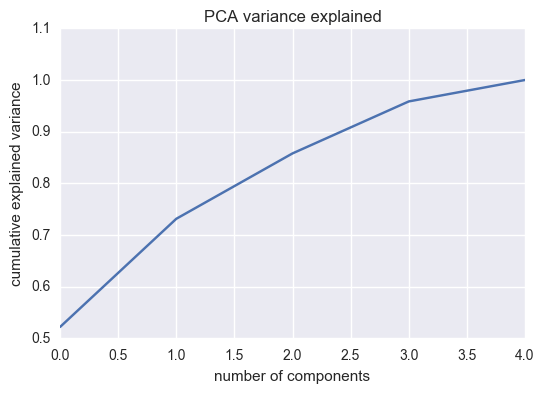

In [141]:
# reduce dimension
# avoid the curse of dimensionality 

pca = PCA().fit(X_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA variance explained')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [142]:
# take pca_components=2, which explains about 87% of variance
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [143]:
X_pca = pca.transform(X)
print("Original shape: {0}".format(X.shape))
print("Reduced shape: {0}".format(X_pca.shape))

Original shape: (51, 5)
Reduced shape: (51, 2)


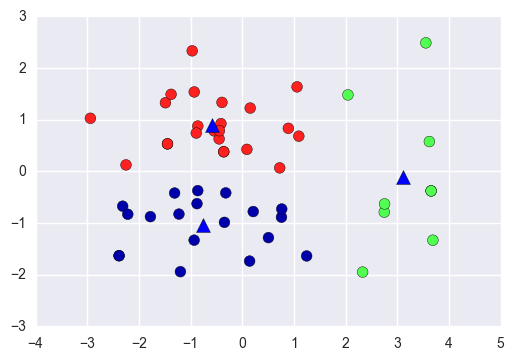

In [144]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_pca)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap=mglearn.cm3, s=60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
           marker='^', s=100)

k in the 2 loop is: 1
i, j are:  0 0
k in the 2 loop is: 2
i, j are:  0 1
k in the 2 loop is: 3
i, j are:  1 0
k in the 2 loop is: 4
i, j are:  1 1


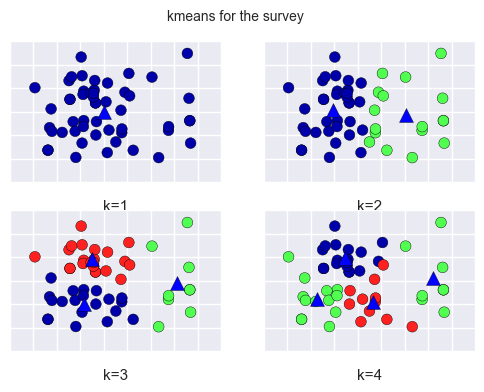

In [145]:
fig, ax = plt.subplots(2, 2)
plt.suptitle("kmeans for the survey")
k = 1
for i in range(2):
    for j in range(2):
        print('k in the 2 loop is:', k)
        kmeans = KMeans(n_clusters= k)
        kmeans.fit(X_pca)
        ax[i, j].scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap=mglearn.cm3, s=60)
        ax[i, j].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
        marker='^', s=100)  # marker is basically for cluster centroid for each group
        ax[i, j].set_xlabel('k={0}'.format(k))
        ax[i, j].set_xticklabels([])
        ax[i, j].set_yticklabels([])
        print('i, j are: ', i, j)
        k += 1
       

In [146]:
# Elbow method and variance explained
from scipy.spatial.distance import cdist, pdist
K = range(1, 13)
KM = [KMeans(n_clusters=k).fit(X_pca) for k in K]
centroids = [k.cluster_centers_ for k in KM]

D_k = [cdist(X_pca, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]
avgWithinSS = [sum(d)/X_pca.shape[0] for d in dist]

# Total with-in sum of square
wcss = [sum(d**2) for d in dist]
tss = sum(pdist(X_pca)**2)/X_pca.shape[0]
bss = tss-wcss

kIdx = 4


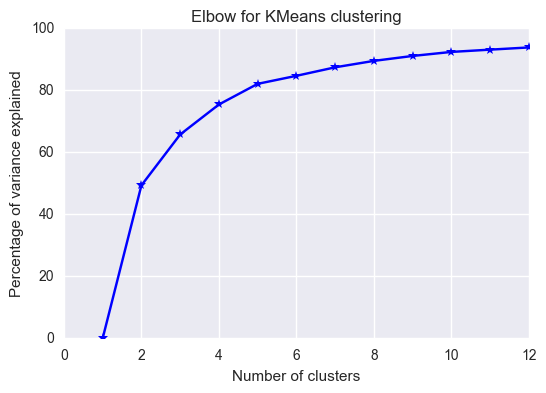

In [147]:
# elbow curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, bss/tss*100, 'b*-')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Percentage of variance explained')
plt.title('Elbow for KMeans clustering')
# optimal number of cluster is 2

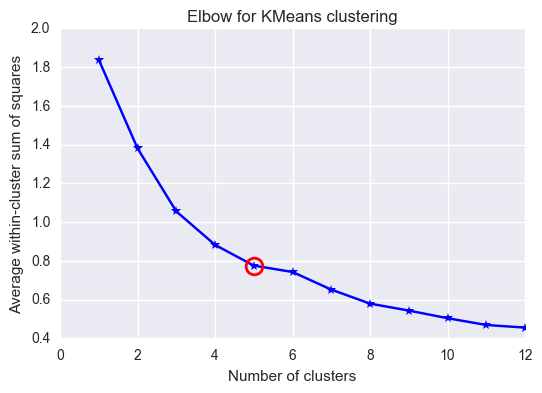

In [148]:
# elbow curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, avgWithinSS, 'b*-')
ax.plot(K[kIdx], avgWithinSS[kIdx], marker='o', markersize=12, 
markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
plt.title('Elbow for KMeans clustering')

In [149]:
from matplotlib.colors import LinearSegmentedColormap

def generate_cmap(colors):
    
    values = range(len(colors))

    vmax = np.ceil(np.max(values))
    color_list = []
    for v, c in zip(values, colors):
        color_list.append( ( v/ vmax, c) )
    return LinearSegmentedColormap.from_list('custom_cmap', color_list)


In [150]:
cm = generate_cmap(['mediumblue', 'r', 'limegreen', 'snow', 'pink'])


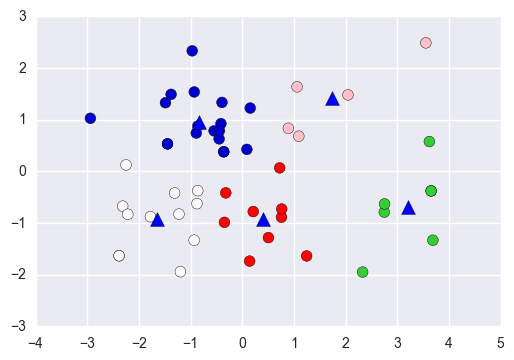

In [151]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_pca)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap=cm,  s=60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
           marker='^', s=100)

In [152]:
print('kmeans_label with num of cluter 5:')
print(kmeans.labels_)

kmeans_label with num of cluter 5:
[3 3 0 0 0 0 2 4 1 2 0 0 0 1 1 3 0 0 3 2 3 0 3 3 4 0 3 1 3 0 0 0 3 0 3 1 0
 3 0 0 1 1 4 1 4 1 2 2 2 4 2]


In [153]:
# group 0
data.iloc[list(np.where(kmeans.labels_ == 0)[0])].head()

,"Group work in major classes is useful for my career, because it makes me gain a lot of skill",APU professors have enough methodological skills,I am satisfied with content of the major classes and I think they will be useful in my after university life,I think liberal art subjects are helpful for me,I think most of APU students study Japanese language only for their future career,on line learning is much more useful than classes at APU
2,3,3,3,3,3,3
3,4,2,3,4,1,3
4,3,3,3,4,2,3
5,4,2,4,4,2,3
10,4,3,4,2,2,3


In [154]:
# group 1
data.iloc[list(np.where(kmeans.labels_ == 1)[0])].head()

,"Group work in major classes is useful for my career, because it makes me gain a lot of skill",APU professors have enough methodological skills,I am satisfied with content of the major classes and I think they will be useful in my after university life,I think liberal art subjects are helpful for me,I think most of APU students study Japanese language only for their future career,on line learning is much more useful than classes at APU
8,3,2,4,2,5,5
13,4,2,2,2,4,3
14,3,3,2,2,4,3
27,2,4,3,3,4,4
35,4,2,2,2,3,3


In [155]:
# group 2
data.iloc[list(np.where(kmeans.labels_ == 2)[0])].head()

,"Group work in major classes is useful for my career, because it makes me gain a lot of skill",APU professors have enough methodological skills,I am satisfied with content of the major classes and I think they will be useful in my after university life,I think liberal art subjects are helpful for me,I think most of APU students study Japanese language only for their future career,on line learning is much more useful than classes at APU
6,3,1,1,1,4,3
9,2,2,1,1,4,4
19,4,1,1,1,5,3
46,1,1,1,1,5,5
47,1,1,1,1,4,5


In [156]:
# group 3
data.iloc[list(np.where(kmeans.labels_ == 3)[0])].head()

,"Group work in major classes is useful for my career, because it makes me gain a lot of skill",APU professors have enough methodological skills,I am satisfied with content of the major classes and I think they will be useful in my after university life,I think liberal art subjects are helpful for me,I think most of APU students study Japanese language only for their future career,on line learning is much more useful than classes at APU
0,4,3,5,4,5,3
1,4,3,5,4,5,3
15,3,3,3,4,4,3
18,5,4,3,4,3,1
20,4,4,4,4,4,3


In [157]:
# group 4
data.iloc[list(np.where(kmeans.labels_ == 4)[0])]

,"Group work in major classes is useful for my career, because it makes me gain a lot of skill",APU professors have enough methodological skills,I am satisfied with content of the major classes and I think they will be useful in my after university life,I think liberal art subjects are helpful for me,I think most of APU students study Japanese language only for their future career,on line learning is much more useful than classes at APU
7,1,1,4,3,3,3
24,2,1,2,2,2,4
42,2,2,2,3,2,4
44,2,2,2,3,3,4
49,1,1,1,1,1,5


In [158]:
# 0: those who find APU to be normal environemnt
# 1: those who are not satisfied with the euducation received and are job oriented
# 2: those who love APU learning environment
# 3 : those who like learning evironment at APU except liberal arts
# 4: those who do not like group work and professor


/Users/kentasuzuki/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


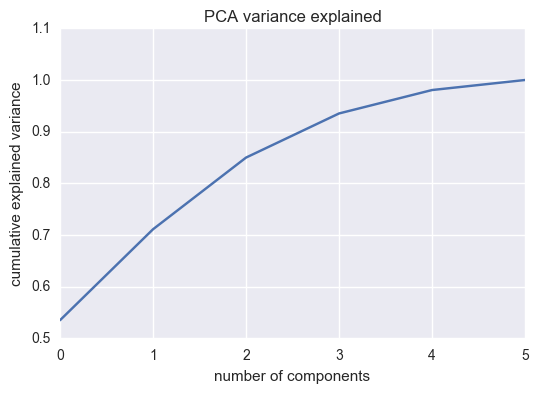

In [160]:
# use 6 questions
# 9: show how the additional question is represented across the clusters.
# reduce dimension
# avoid the curse of dimensionality 
scaler.fit(X_full)
X_scaled = scaler.transform(X_full)
pca = PCA().fit(X_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA variance explained')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [161]:
# take pca_components=2, which explains about 87% of variance
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [162]:
X_pca = pca.transform(X)
print("Original shape: {0}".format(X.shape))
print("Reduced shape: {0}".format(X_pca.shape))

Original shape: (51, 5)
Reduced shape: (51, 2)


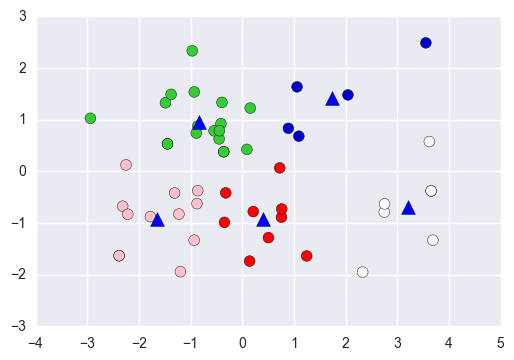

In [163]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_pca)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap=cm,  s=60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
           marker='^', s=100)

In [164]:
print('kmeans_label with num of cluter 5:')
print(kmeans.labels_)

kmeans_label with num of cluter 5:
[4 4 2 2 2 2 3 0 1 3 2 2 2 1 1 4 2 2 4 3 4 2 4 4 0 2 4 1 4 2 2 2 4 2 4 1 2
 4 2 2 1 1 0 1 0 1 3 3 3 0 3]
